In [80]:
import pandas as pd
import numpy as np

#### Nesa etapa iremos fazer a definição de tipos, bem como o tratamentos dos dados faltantes,normalização, discretização e limpeza do dados. Todo o processo de pré processamento.

In [81]:
###Essa base é a base seed, através dos ids dos jogadores, iremos fazer os joins até chegar
###na base final utilizada nessa etapa
df_users_seed = pd.read_csv("SummonerFinalData.csv", index_col = 'accountId')

### Lista das 10 ultimas partidas de cada jogador na base seed. 
df_matches_acc_id = pd.read_csv("matchByAccounbtIdFiltered10.csv", index_col = 'accountId')

### Estatisticas de cada time dentro das partidas
df_match_stats = pd.read_csv("dataMatchesStats.csv", index_col = 'gameId')

### Estatisticas 
df_players_matches_stats = pd.read_csv("playersMatchesStats.csv", index_col = 'gameId')

In [82]:
####Print de algumas informações basicas######
print(df_users_seed.shape)
print(df_users_seed.dtypes)

(2661, 13)
Unnamed: 0        int64
tier             object
summonerId       object
summonerName     object
leaguePoints      int64
wins              int64
losses            int64
veteran            bool
inactive           bool
freshBlood         bool
hotStreak          bool
summonerLevel     int64
puuid            object
dtype: object


In [83]:
print(df_matches_acc_id.shape)
print(df_matches_acc_id.dtypes)

(53720, 8)
platformId    object
gameId         int64
champion       int64
queue          int64
season         int64
timestamp      int64
role          object
lane          object
dtype: object


In [84]:
print(df_match_stats.shape)
print(df_match_stats.dtypes)

(60654, 16)
teamId                   int64
win                     object
firstBlood                bool
firstTower                bool
firstInhibitor            bool
firstBaron                bool
firstDragon               bool
firstRiftHerald           bool
towerKills               int64
inhibitorKills           int64
baronKills               int64
dragonKills              int64
vilemawKills             int64
riftHeraldKills          int64
dominionVictoryScore     int64
bans                    object
dtype: object


In [85]:
print(df_players_matches_stats.shape)
print(df_players_matches_stats.dtypes)

(303252, 13)
champion              int64
spell1                int64
spell2                int64
win                    bool
kills                 int64
deaths                int64
assists               int64
totalDamageDealt      int64
goldEarned            int64
champLevel            int64
totalMinionsKilled    int64
item0                 int64
item1                 int64
dtype: object


In [86]:
###Checar com professor a questão de tipagem.

In [87]:
####Dropando essa coluna intrusa
df_users_seed.drop('Unnamed: 0', axis = 1, inplace=True)

## Ajuste de Tipos

In [88]:
### Ajuste de tipos da base de usuários

### Minha dúvida é se identificadores como (puuid ou summonerId são categoricos ou string, porque categorico é tecnicamente finito)
df_users_seed['tier'] = df_users_seed['tier'].astype('category')
df_users_seed['summonerId'] = df_users_seed['summonerId'].astype('string')
df_users_seed['summonerName'] = df_users_seed['summonerName'].astype('string')
df_users_seed['puuid'] = df_users_seed['puuid'].astype('string')

print(df_users_seed.dtypes)
print(df_users_seed['tier'].cat.categories)
# df_users_seed.head()

tier             category
summonerId         string
summonerName       string
leaguePoints        int64
wins                int64
losses              int64
veteran              bool
inactive             bool
freshBlood           bool
hotStreak            bool
summonerLevel       int64
puuid              string
dtype: object
Index(['DIAMONDI', 'DIAMONDII', 'DIAMONDIII', 'DIAMONDIV', 'MASTER'], dtype='object')


In [89]:
### Ajuste de tipos da lista de partidas

### Platform ID pode ser considerado uma categoria mesmo só tendo dados de BR1? Season pode ser uma categoria?
df_matches_acc_id['platformId'] = df_matches_acc_id['platformId'].astype('category')
df_matches_acc_id['role'] = df_matches_acc_id['role'].astype('category')
df_matches_acc_id['lane'] = df_matches_acc_id['lane'].astype('category')

print(df_matches_acc_id.dtypes)
print(df_matches_acc_id['platformId'].cat.categories)
print(df_matches_acc_id['role'].cat.categories)
print(df_matches_acc_id['lane'].cat.categories)

platformId    category
gameId           int64
champion         int64
queue            int64
season           int64
timestamp        int64
role          category
lane          category
dtype: object
Index(['BR1'], dtype='object')
Index(['DUO', 'DUO_CARRY', 'DUO_SUPPORT', 'NONE', 'SOLO'], dtype='object')
Index(['BOTTOM', 'JUNGLE', 'MID', 'NONE', 'TOP'], dtype='object')


In [90]:
### Ajuste d etipos das estatisticas da partida

df_match_stats['win'] = df_match_stats['win'].astype('category')

print(df_match_stats.dtypes)
print(df_match_stats['win'].cat.categories)

teamId                     int64
win                     category
firstBlood                  bool
firstTower                  bool
firstInhibitor              bool
firstBaron                  bool
firstDragon                 bool
firstRiftHerald             bool
towerKills                 int64
inhibitorKills             int64
baronKills                 int64
dragonKills                int64
vilemawKills               int64
riftHeraldKills            int64
dominionVictoryScore       int64
bans                      object
dtype: object
Index(['Fail', 'Win'], dtype='object')


## Checagem de dados faltantes

In [91]:
def getMissData(df):
     return pd.DataFrame({'names' : df.columns, 'types' : df.dtypes, 'NA #': df.isna().sum(), 'NA %' : (df.isna().sum() / df.shape[0]) * 100})
    

In [92]:
### Dados faltantes
getMissData(df_users_seed)

,names,types,NA #,NA %
tier,tier,category,0,0.0
summonerId,summonerId,string,0,0.0
summonerName,summonerName,string,0,0.0
leaguePoints,leaguePoints,int64,0,0.0
wins,wins,int64,0,0.0
losses,losses,int64,0,0.0
veteran,veteran,bool,0,0.0
inactive,inactive,bool,0,0.0
freshBlood,freshBlood,bool,0,0.0
hotStreak,hotStreak,bool,0,0.0


In [93]:
getMissData(df_matches_acc_id)

,names,types,NA #,NA %
platformId,platformId,category,0,0.0
gameId,gameId,int64,0,0.0
champion,champion,int64,0,0.0
queue,queue,int64,0,0.0
season,season,int64,0,0.0
timestamp,timestamp,int64,0,0.0
role,role,category,0,0.0
lane,lane,category,0,0.0


In [94]:
getMissData(df_match_stats)

,names,types,NA #,NA %
teamId,teamId,int64,0,0.000000
win,win,category,2,0.003297
firstBlood,firstBlood,bool,0,0.000000
firstTower,firstTower,bool,0,0.000000
firstInhibitor,firstInhibitor,bool,0,0.000000
firstBaron,firstBaron,bool,0,0.000000
firstDragon,firstDragon,bool,0,0.000000
firstRiftHerald,firstRiftHerald,bool,0,0.000000
towerKills,towerKills,int64,0,0.000000
inhibitorKills,inhibitorKills,int64,0,0.000000


In [95]:
getMissData(df_players_matches_stats)

,names,types,NA #,NA %
champion,champion,int64,0,0.0
spell1,spell1,int64,0,0.0
spell2,spell2,int64,0,0.0
win,win,bool,0,0.0
kills,kills,int64,0,0.0
deaths,deaths,int64,0,0.0
assists,assists,int64,0,0.0
totalDamageDealt,totalDamageDealt,int64,0,0.0
goldEarned,goldEarned,int64,0,0.0
champLevel,champLevel,int64,0,0.0


**Como os dados foram obtidos através de api, não temos dados faltantes**

## Detecção de Outliers

**No League of legends, o que pode ser considerado um outlier? Primeiro vamos analisar as vitórias e derrotas do jogador**

In [96]:
df_users_seed[['wins','losses']].describe()

,wins,losses
count,2661.000000,2661.000000
mean,320.681323,290.610673
std,207.561816,206.441510
min,20.000000,8.000000
25%,172.000000,141.000000
50%,269.000000,239.000000
75%,421.000000,390.000000
max,1363.000000,1338.000000


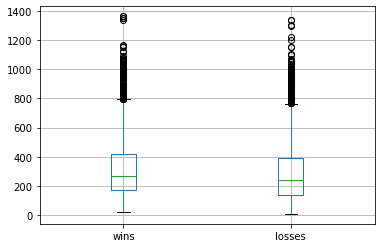

In [97]:
df_users_seed.boxplot(column=['wins', 'losses'])

**Como alguns player jogam a mais tempo, não podemos analisar esse número isoladamente, por isso vamos ver em relação ao tempo de jogo, que podemos considerar como o Summoner Level**

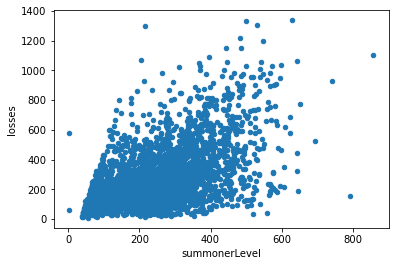

In [98]:

df_users_seed.plot.scatter(x='summonerLevel', y='losses')

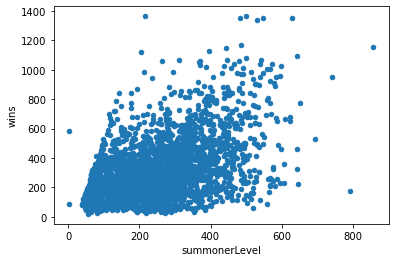

In [99]:
df_users_seed.plot.scatter(x='summonerLevel', y='wins')

**O problema de usar o summoner level é porque até um certo tempo, existia um limite de level no League of Legends, onde jogadores podiam chegar somente até o level 30, mas o número de vitorias e derrotas continuava subindo. Por conta desse limite, faz sentido tentarmos agrupar por tiers**


In [100]:
df_users_by_tier = df_users_seed.groupby(['tier'])
df_users_by_tier[['wins','losses']].mean()

,wins,losses
tier,,
DIAMONDI,276.444444,252.752525
DIAMONDII,238.631313,220.585859
DIAMONDIII,224.860697,210.104478
DIAMONDIV,212.213198,200.507614
MASTER,355.835565,320.226567


DIAMONDI           AxesSubplot(0.1,0.679412;0.363636x0.220588)
DIAMONDII     AxesSubplot(0.536364,0.679412;0.363636x0.220588)
DIAMONDIII         AxesSubplot(0.1,0.414706;0.363636x0.220588)
DIAMONDIV     AxesSubplot(0.536364,0.414706;0.363636x0.220588)
MASTER                 AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

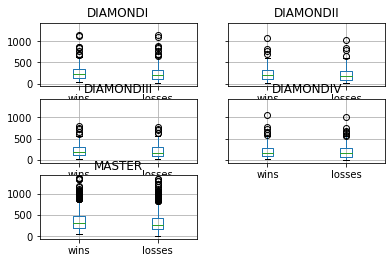

In [101]:
df_users_by_tier.boxplot(column=['wins','losses'])

**Por tier nós entramos na questão se o jogador é bom ou não, então vale a pena vermos a relação entre as duas variáveis**

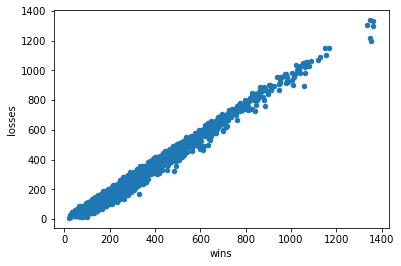

In [102]:
df_users_seed.plot.scatter(x='wins', y='losses')

**Pelo grafico, podemos ver que o mais comum é a pessoa ter a mesma quantidade de vitórias que derrotas, então os valores não são necessáriamente outliers**

**Save Post Processed Data**

In [103]:
df_users_seed.to_csv("SummonerFinalData_PP.csv")

df_matches_acc_id.to_csv("matchByAccounbtIdFiltered10_PP.csv")

df_match_stats.to_csv("dataMatchesStats_PP.csv")

df_players_matches_stats.to_csv("playersMatchesStats_PP.csv")